Durchschnittlicher Trinkgeldbetrag: 3.00 $
Durchschnittlicher Gesamtbetrag der Rechnung: 19.79 $
Durchschnittlicher Trinkgeldprozentsatz: 16.1 %
 Avg Tip Female: 2.83 $
 Avg Tip Male: 3.09 $
T-Test Ergebnis: t-statistic = -1.4895, p-value = 0.1378


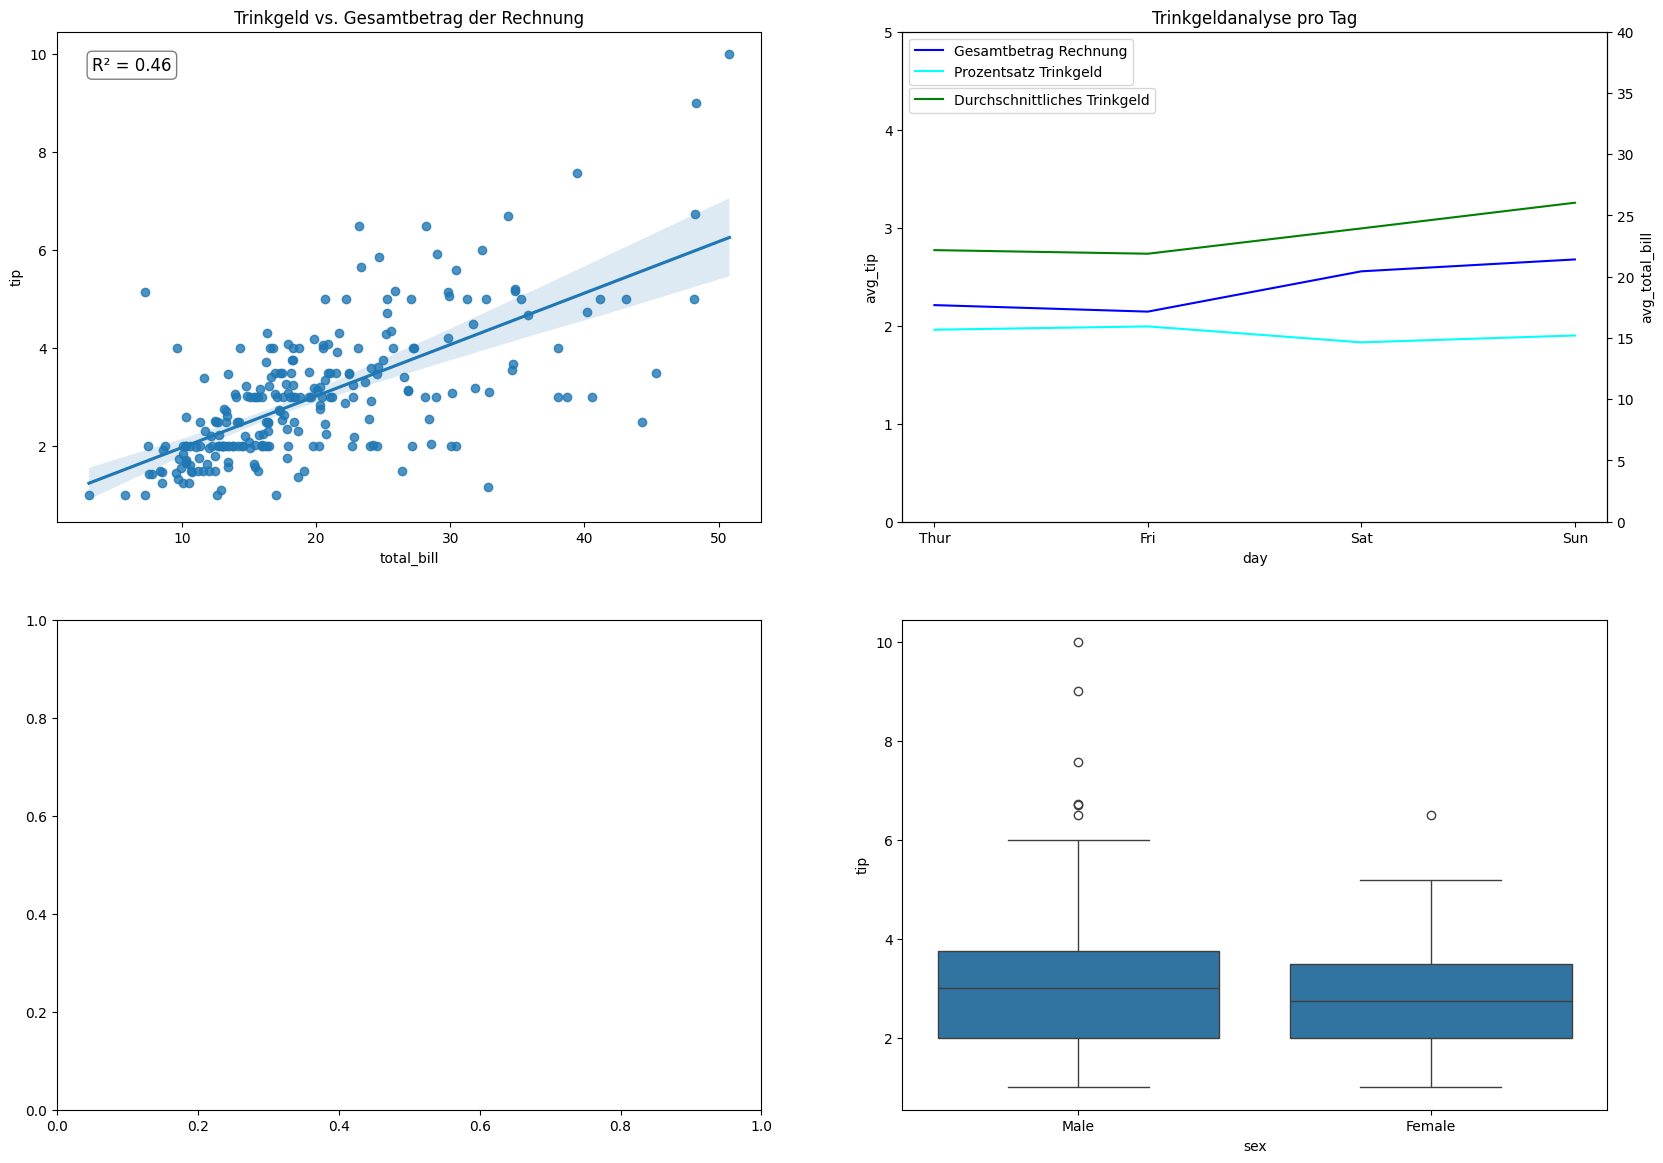

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pingouin as pg

#  Datensatz laden
df = sns.load_dataset("tips")
#print(df.head())

#  Grundlegende Analyse der Trinkgeldbeträge
avg_tip = df["tip"].mean()
avg_total_bill = df["total_bill"].mean()

tip_pct = (df["tip"] / df["total_bill"]) * 100
avg_tip_pct = tip_pct.mean()

print(f"Durchschnittlicher Trinkgeldbetrag: {avg_tip:.2f} $")
print(f"Durchschnittlicher Gesamtbetrag der Rechnung: {avg_total_bill:.2f} $")
print(f"Durchschnittlicher Trinkgeldprozentsatz: {avg_tip_pct:.1f} %")

#  Korrelation zwischen Trinkgeld und Gesamtbetrag der Rechnung
r_total_tip, p_total_tip = stats.pearsonr(df["total_bill"], df["tip"])
r2_total_tip = r_total_tip**2
text_r2 = f"R² = {r2_total_tip:.2f}"

# Daten nach Tagen filtern
summary_df = df.groupby("day", observed=True).agg(
    avg_tip=("tip", "mean"),
    avg_total_bill=("total_bill", "mean"),
    tip_pct=("tip", lambda x: (x.sum() / df.loc[x.index, "total_bill"].sum()) * 100),
    count=("tip", "size")
)

#print(summary_df)

# Durchschnittstrinkgeld nach Geschlecht
avg_tips_sex = df.groupby("sex", observed=False)["tip"].mean()
print(f" Avg Tip Female: {avg_tips_sex['Female']:.2f} $\n",f"Avg Tip Male: {avg_tips_sex['Male']:.2f} $")

female_tips = df[df["sex"] == "Female"]["tip"]
male_tips = df[df["sex"] == "Male"]["tip"]

#  Mitelwert der Trinkgelder nach Geschlecht vergleichen
t_stat, p_value = stats.ttest_ind(female_tips, male_tips, equal_var=False)
print(f"T-Test Ergebnis: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")



#  Visualisierung
fig, ax = plt.subplots(2, 2, figsize=(20, 14))

ax2 = ax[0, 1].twinx()

sns.lineplot(data=summary_df, x="day", y="avg_tip", legend=False, ax=ax[0, 1], color = "green")
ax[0, 1].set_title("Trinkgeldanalyse pro Tag")
ax[0, 1].set_ylim(0, 5)
ax[0, 1].legend(["Durchschnittliches Trinkgeld"], loc="upper left", bbox_to_anchor=[0, 0.9])

sns.lineplot(data=summary_df, x="day", y="avg_total_bill", legend=True, ax=ax2, color="blue", label= "Gesamtbetrag Rechnung")
sns.lineplot(data=summary_df, x="day", y="tip_pct", legend=True, ax=ax2, color="cyan", label = "Prozentsatz Trinkgeld")
ax2.set_ylim(0, 40)
ax2.legend(loc="upper left", bbox_to_anchor=[0, 1])




#  Regressionplot erstellen
sns.regplot(x="total_bill", y="tip", data=df, ax=ax[0, 0], order=1, ci=95)
ax[0, 0].set_title("Trinkgeld vs. Gesamtbetrag der Rechnung")
ax[0, 0].text(0.05, 0.95, text_r2, transform=ax[0, 0].transAxes, fontsize=12, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))



sns.boxplot(data=df, x="sex", y="tip", ax=ax[1, 1])

#ax[1, 1] = pg.plot_blandaltman(df_sex_clean["Female Tip"], df_sex_clean["Male Tip"], ax=ax[1, 1])


# sns.barplot(data=summary_df, x="day", y="avg_tip", ax=ax[1, 0])
# ax[1, 0].set_title("Durschnittliches Trinkgeld pro Tag")

# Regressionplot Trinkgeld nach Geschlecht
# sns.regplot(data=df_sex_comparison, x="Female Tip", y="Male Tip", ax=ax[1, 1])
# ax[1, 1].text(0.05, 0.95, text_r2_fm, transform=ax[1, 1].transAxes, fontsize=12, 
#             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()


In [175]:
import pandas as pd

# Tabelle 1: Kunden
kunden = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Max', 'Julia', 'Ben']
})

# Tabelle 2: Käufe
kaeufe = pd.DataFrame({
    'Kunde_ID': [1, 2, 1, 4],
    'Produkt': ['Apfel', 'Banane', 'Birne', 'Dattel']
})

# Zusammenführen (Left Join, damit alle Kunden bleiben)
df_final = pd.merge(kunden, kaeufe, left_on="ID", right_on="Kunde_ID", how="left")
